## Dataset Analysis

Importing libraries and dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

df = pd.read_csv('../../data/tweets.csv')
df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


Check null values

In [2]:
df.isnull().sum()       # No null values

tweet_text            0
cyberbullying_type    0
dtype: int64

Check duplicated rows

In [3]:
df.duplicated().sum()   # 36 duplicated entries 

36

In [4]:
df[df.duplicated(keep=False)]       # Duplicated with equal tweet_text and equal cyberbullying_type     (DROP)

,tweet_text,cyberbullying_type
829,Our pancakes are selling like hotcakes Shaz - ...,not_cyberbullying
1712,This is the opportunity to prove ourselves lik...,not_cyberbullying
1758,Our pancakes are selling like hotcakes Shaz - ...,not_cyberbullying
1984,@TVWEEKmag: There is only 1 way to stay in the...,not_cyberbullying
2611,It wouldn't be fair. Kat knows NOTHING of fair...,not_cyberbullying
...,...,...
20604,A Pakistani court has sentenced 86 members of ...,religion
41403,"Still, Davis, who is gay, said he pays a socia...",ethnicity
46915,Racism won't stop as long as u stil select ur ...,ethnicity
46962,"Still, Davis, who is gay, said he pays a socia...",ethnicity


In [5]:
d = df[df.duplicated(subset=['tweet_text'], keep = False)]      
d

,tweet_text,cyberbullying_type
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
8,@stockputout everything but mostly my priest,not_cyberbullying
17,@0xabad1dea @kelseytheodore2 twitter is basica...,not_cyberbullying
24,Wishing my arena partner was on. &gt;.&gt; Re...,not_cyberbullying
27,@gcarothers eek. i can't stand split keyboards...,not_cyberbullying
...,...,...
46360,RT @AntonioFrench: I spent the morning at the ...,ethnicity
46556,"He can't be a server at our restaurant, that b...",ethnicity
46915,Racism won't stop as long as u stil select ur ...,ethnicity
46962,"Still, Davis, who is gay, said he pays a socia...",ethnicity


In [6]:
d[d['tweet_text'] == "Still, Davis, who is gay, said he pays a social premium for supporting Trump. “I’ve been called Uncle Tom, Uncle Ruckus [a character from the ‘Boondocks’ comic strip], traitor, house Negro, Oreo — white on the inside,” he said. “Literally everything but a proud black man.”"]

,tweet_text,cyberbullying_type
41403,"Still, Davis, who is gay, said he pays a socia...",ethnicity
46962,"Still, Davis, who is gay, said he pays a socia...",ethnicity


In [7]:
d[d['tweet_text'] == "@stockputout everything but mostly my priest"]

,tweet_text,cyberbullying_type
8,@stockputout everything but mostly my priest,not_cyberbullying
31583,@stockputout everything but mostly my priest,other_cyberbullying


In [8]:
d[d['tweet_text'] == "@Jason_Gio meh. :P  thanks for the heads up, but not too concerned about another angry dude on twitter."]

,tweet_text,cyberbullying_type
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
28158,"@Jason_Gio meh. :P thanks for the heads up, b...",other_cyberbullying


Compute the average length of tweets

In [9]:
avg_len_tweet = round(df['tweet_text'].apply(len).mean(), 2)
avg_len_tweet

136.25

Analyze different cyberbullying types

In [10]:
df['cyberbullying_type'].value_counts()

cyberbullying_type
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

In [11]:
cyberbullying_types = df['cyberbullying_type'].unique()
cyt_values = list(df['cyberbullying_type'].value_counts())

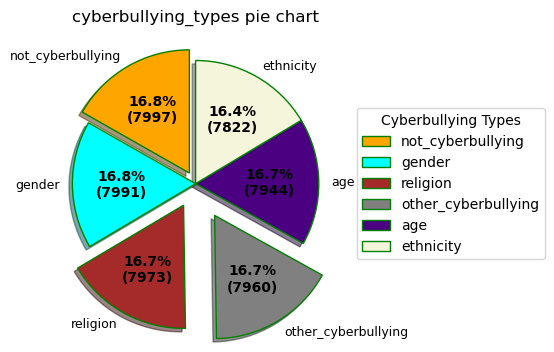

In [12]:
# Creating explode data
explode = (0.1, 0.0, 0.2, 0.3, 0.0, 0.0)
 
# Creating color parameters
colors = ("orange", "cyan", "brown",
          "grey", "indigo", "beige")
 
# Wedge properties
wp = {'linewidth': 1, 'edgecolor': "green"}
 
# Creating autocpt arguments
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)
 
 
# Creating plot
fig, ax = plt.subplots(figsize=(4, 4))
wedges, texts, autotexts = ax.pie(cyt_values,
                                  autopct=lambda pct: func(pct, cyt_values),
                                  explode=explode,
                                  labels=cyberbullying_types,
                                  shadow=True,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops=wp,
                                  #textprops=dict(color="black")
                                  textprops = {'fontsize': 9}
                                 )
 
# Adding legend
ax.legend(wedges, cyberbullying_types,
          title="Cyberbullying Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))
 
plt.setp(autotexts, size=10, weight="bold")
ax.set_title("cyberbullying_types pie chart")
 
# show plot
plt.show()

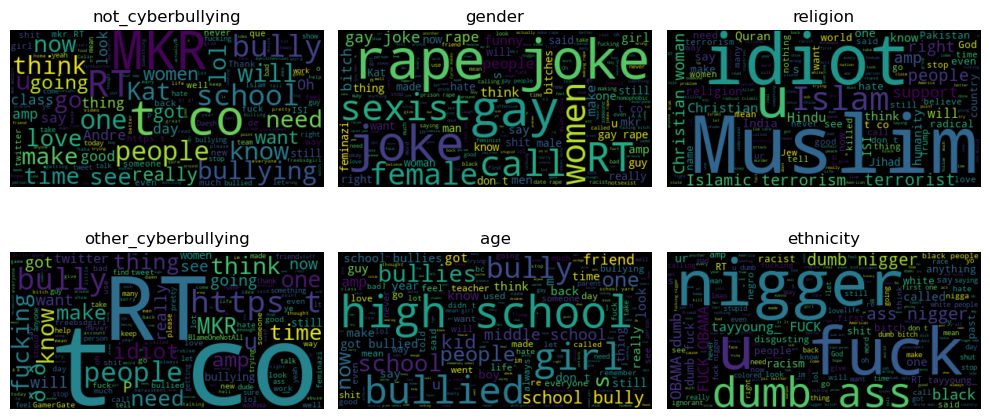

In [13]:
plt.figure(figsize=(10, 5))

# For each cyberbullying type:
for i in range (len(cyberbullying_types)):
    tweets = df[df['cyberbullying_type'] == cyberbullying_types[i]]
    text = tweets['tweet_text'].map('{} '.format).sum()               # Concatena tutti i messaggi in un unica stringa usando spazio come separatore 

    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.subplot(2, 3, i+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(cyberbullying_types[i])

plt.tight_layout()
plt.show()